In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

In [2]:
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.optimize import minimize

In [5]:
dfu = pd.read_csv('/content/2022_sub_region_1_daily_2022_US_Wyoming_daily_symptoms_dataset.csv', index_col = 0)
dfu['date'] = pd.to_datetime(dfu['date'])

df_first = dfu.head(n=274)
display(df_first)

,country_region,sub_region_1,sub_region_1_code,sub_region_2,sub_region_2_code,place_id,date,symptom:Abdominal obesity,symptom:Abdominal pain,symptom:Acne,...,symptom:Wart,symptom:Water retention,symptom:Weakness,symptom:Weight gain,symptom:Wheeze,symptom:Xeroderma,symptom:Xerostomia,symptom:Yawn,symptom:hyperhidrosis,symptom:pancreatitis
country_region_code,,,,,,,,,,,,,,,,,,,,,
US,United States,Wyoming,US-WY,NaN,NaN,ChIJaS7hSDTiXocRLzh90nkisCY,2022-01-01,2.02,4.59,6.34,...,1.19,NaN,NaN,3.08,NaN,2.49,NaN,NaN,NaN,NaN
US,United States,Wyoming,US-WY,NaN,NaN,ChIJaS7hSDTiXocRLzh90nkisCY,2022-01-02,1.65,4.85,7.23,...,1.04,0.51,NaN,2.67,NaN,2.66,NaN,NaN,NaN,NaN
US,United States,Wyoming,US-WY,NaN,NaN,ChIJaS7hSDTiXocRLzh90nkisCY,2022-01-03,1.83,4.40,5.92,...,1.40,NaN,0.58,2.77,NaN,2.18,NaN,NaN,NaN,0.46
US,United States,Wyoming,US-WY,NaN,NaN,ChIJaS7hSDTiXocRLzh90nkisCY,2022-01-04,1.78,4.41,6.09,...,1.14,0.57,NaN,2.68,NaN,2.18,NaN,NaN,0.45,NaN
US,United States,Wyoming,US-WY,NaN,NaN,ChIJaS7hSDTiXocRLzh90nkisCY,2022-01-05,1.80,3.69,5.89,...,1.14,NaN,NaN,2.68,NaN,2.21,0.45,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
US,United States,Wyoming,US-WY,NaN,NaN,ChIJaS7hSDTiXocRLzh90nkisCY,2022-09-27,1.25,4.05,5.38,...,1.36,NaN,NaN,2.66,NaN,1.58,NaN,NaN,0.47,0.46
US,United States,Wyoming,US-WY,NaN,NaN,ChIJaS7hSDTiXocRLzh90nkisCY,2022-09-28,1.21,3.49,5.42,...,1.21,NaN,NaN,2.38,NaN,1.51,NaN,NaN,NaN,0.69
US,United States,Wyoming,US-WY,NaN,NaN,ChIJaS7hSDTiXocRLzh90nkisCY,2022-09-29,1.48,4.19,5.38,...,1.32,NaN,NaN,2.30,NaN,1.74,NaN,NaN,NaN,NaN


In [8]:
dfn = pd.DataFrame()
l=[]

for count, column in enumerate(df_first):    
    # Select column contents by column
    # name using [] operator
    if(count>8):
      columnSeriesObj = df_first[column]
      columnSeriesObj[np.isnan(columnSeriesObj)] = 0
      dfn.insert(count-9, column, columnSeriesObj.tolist(), True)
      l.append(columnSeriesObj.tolist())
      #print('Column Name : ', column)
      #print('Column Contents : ', columnSeriesObj.values)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:8870: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3249: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe

In [9]:
dfn.shape

(274, 420)

In [10]:
X = dfn.values # getting all values as a matrix of dataframe 

In [11]:
dfn.head(n=4)

,symptom:Acne,symptom:Actinic keratosis,symptom:Acute bronchitis,symptom:Adrenal crisis,symptom:Ageusia,symptom:Alcoholism,symptom:Allergic conjunctivitis,symptom:Allergy,symptom:Amblyopia,symptom:Amenorrhea,...,symptom:Wart,symptom:Water retention,symptom:Weakness,symptom:Weight gain,symptom:Wheeze,symptom:Xeroderma,symptom:Xerostomia,symptom:Yawn,symptom:hyperhidrosis,symptom:pancreatitis
0,6.34,0.0,0.64,0.0,0.0,5.35,0.0,9.33,0.0,0.0,...,1.19,0.00,0.00,3.08,0.0,2.49,0.0,0.0,0.00,0.00
1,7.23,0.0,0.66,0.0,0.0,3.96,0.0,9.28,0.0,0.0,...,1.04,0.51,0.00,2.67,0.0,2.66,0.0,0.0,0.00,0.00
2,5.92,0.0,0.79,0.0,0.0,3.95,0.0,9.75,0.0,0.0,...,1.40,0.00,0.58,2.77,0.0,2.18,0.0,0.0,0.00,0.46
3,6.09,0.0,0.86,0.0,0.0,3.99,0.0,9.34,0.0,0.0,...,1.14,0.57,0.00,2.68,0.0,2.18,0.0,0.0,0.45,0.00


In [12]:
X

array([[6.34, 0.  , 0.64, ..., 0.  , 0.  , 0.  ],
       [7.23, 0.  , 0.66, ..., 0.  , 0.  , 0.  ],
       [5.92, 0.  , 0.79, ..., 0.  , 0.  , 0.46],
       ...,
       [5.38, 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [5.22, 0.  , 0.53, ..., 0.  , 0.53, 0.  ],
       [5.41, 0.  , 0.  , ..., 0.  , 0.58, 0.  ]])

In [13]:
xip = dfn['symptom:Fever']

In [14]:
xip

0      4.96
1      5.14
2      5.88
3      6.19
4      5.25
       ... 
269    3.13
270    3.47
271    3.11
272    3.25
273    3.01
Name: symptom:Fever, Length: 274, dtype: float64

In [15]:
np.max(xip)

7.22

In [16]:
import numpy as np
from sklearn.preprocessing import normalize

xix = xip / np.max(xip)

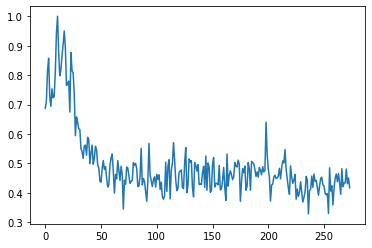

In [17]:
plt.plot(xix)

In [18]:
xxx = xix.values

In [19]:
xxx[0]

0.6869806094182825

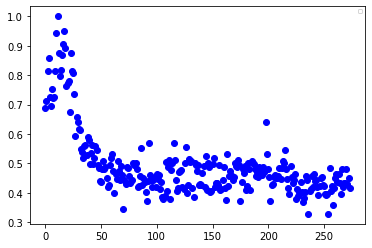

In [20]:
for i,j in enumerate(xxx):
  plt.scatter(i,j,marker ='o', color = 'blue')
 
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300 
plt.legend(loc=1, prop={'size': 5}) 
# Show the plot
plt.show()

In [21]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

I_d = xxx # from dataset
S_f=[]
I_f=[]
R_f=[]

I0, R0 = 0.6869806094182825, 0.0
S0 = 1 - I0 - R0

params = []

ti = np.linspace(0, 274, 274)

def deriv(y, ti, a,b):
    S, I, R = y
    dSdt = -a * S * I 
    dIdt =  a * S * I  - b * I
    dRdt = b * I
    return dSdt, dIdt, dRdt

def fn(y):
    # parameters unwrapped
    a,b = y;   
    
    y0 = S0, I0, R0

    ret = odeint(deriv, y0, ti, args= (a,b))
    S, I, R = ret.T
  
    error = sum((I-I_d)*(I-I_d))
    return error

# initialise with current best guess
init_x = [0.0, 0.0]

res = minimize(fn, init_x, method='Nelder-Mead', tol=1e-8)

params.append(res.x)

y0 = S0, I0, R0
ret = odeint(deriv, y0, ti, args=(res.x[0],res.x[1]))
S, I, R = ret.T
S_f.append(S)
I_f.append(I)
R_f.append(R)

S0, I0, R0 = S[6],I[6],R[6]

In [22]:
res.x 

array([-3.84201632e-10,  2.43491055e-03])

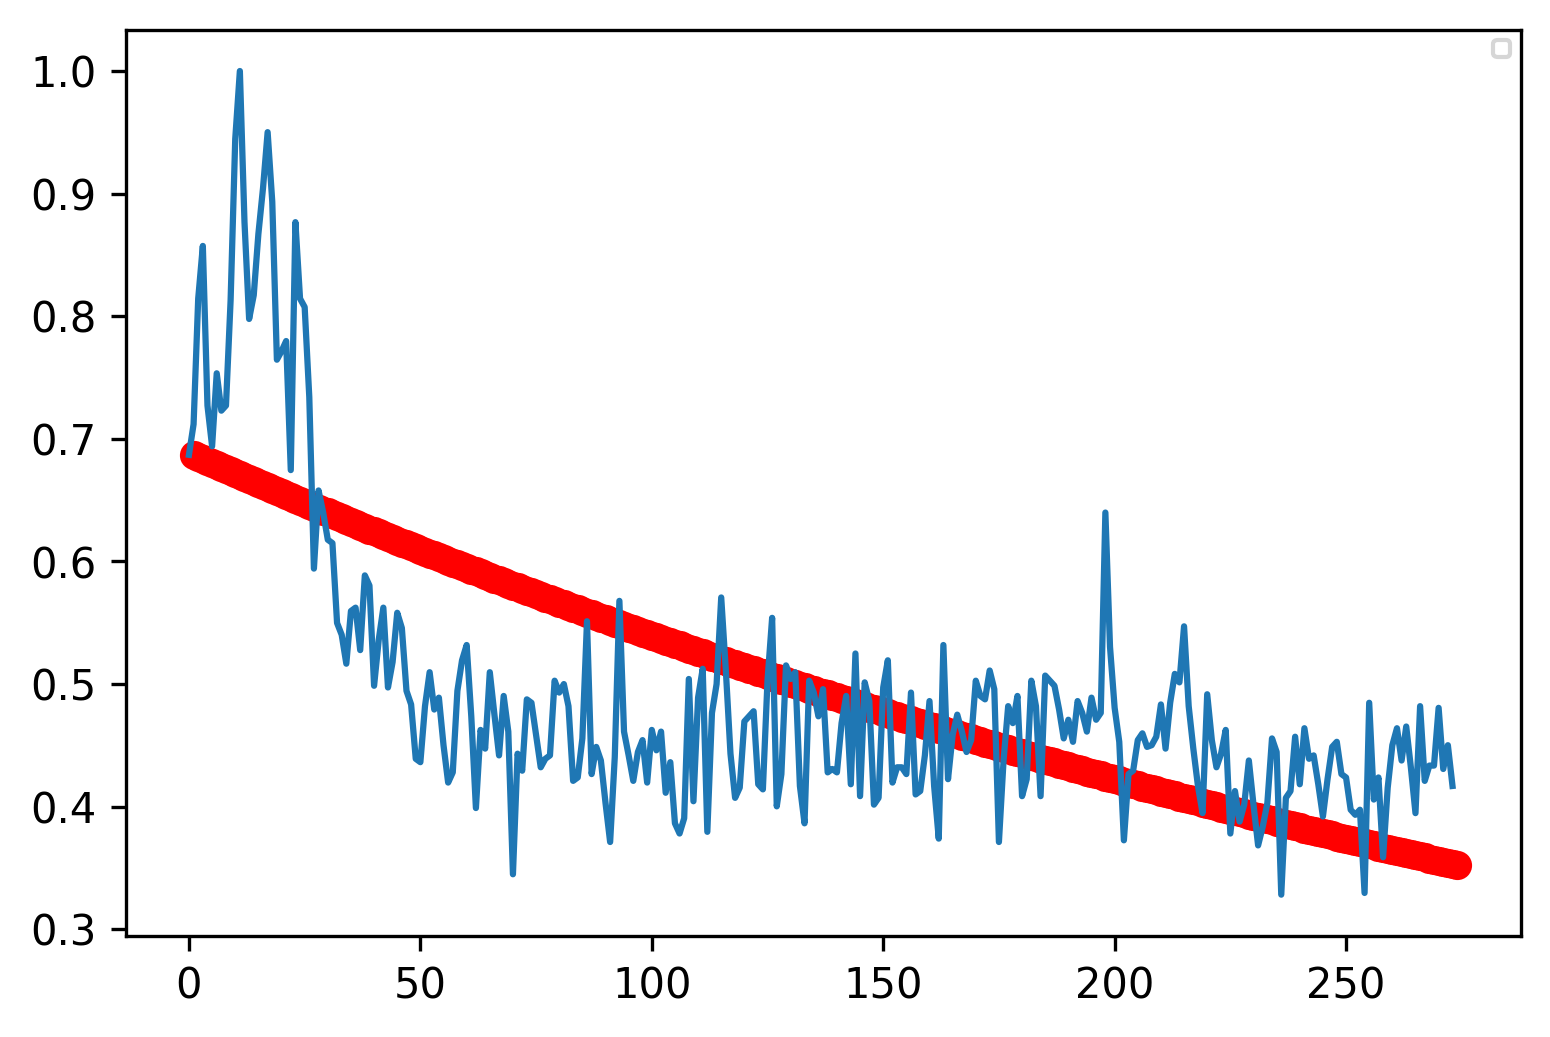

In [23]:
for i,j in enumerate(I_f[0]):
  plt.scatter(i+1,j , color = 'red', marker = 'o')

plt.plot(xxx)
 
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300 
plt.legend(loc=1, prop={'size': 5}) 
# Show the plot
plt.show()

In [79]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

I_d = xxx # from dataset
S_f=[]
I_f=[]
R_f=[]

I0, R0 = 0.6869806094182825, 0.0
S0 = 1 - I0 - R0

params = []
init_x = [0.005, 0.002]

for t in range(40):

  ti = np.linspace(7*(t), 7*(t+1)-1, 7)
  def deriv(y, ti, a,b):
      S, I, R = y
      dSdt = -a * S * I 
      dIdt =  a * S * I  - b * I
      dRdt = b * I
      return dSdt, dIdt, dRdt

  def fn(y):
      # parameters unwrapped
      a,b = y;   
      y0 = S0, I0, R0
      ret = odeint(deriv, y0, ti, args= (a,b))
      S, I, R = ret.T
      
      c = I_d[7*(t):7*(t+1)]
      error = sum((I-c)*(I-c))
      return error

  # initialise with current best guess
  init_x = [0.005, 0.002]
  res = minimize(fn, init_x, method='Nelder-Mead', tol=1e-8)
  params.append(res.x)

  y0 = S0, I0, R0
  ret = odeint(deriv, y0, ti, args=(res.x[0],res.x[1]))
  S, I, R = ret.T
  S_f.append(S)
  I_f.append(I)
  R_f.append(R)

  S0, I0, R0 = S[6],I[6],R[6]

In [ ]:
params

In [80]:
beta = []
gamma = []

for t in range(40):
  for _ in range(7):
    beta.append(params[t][0])
    gamma.append(params[t][1])

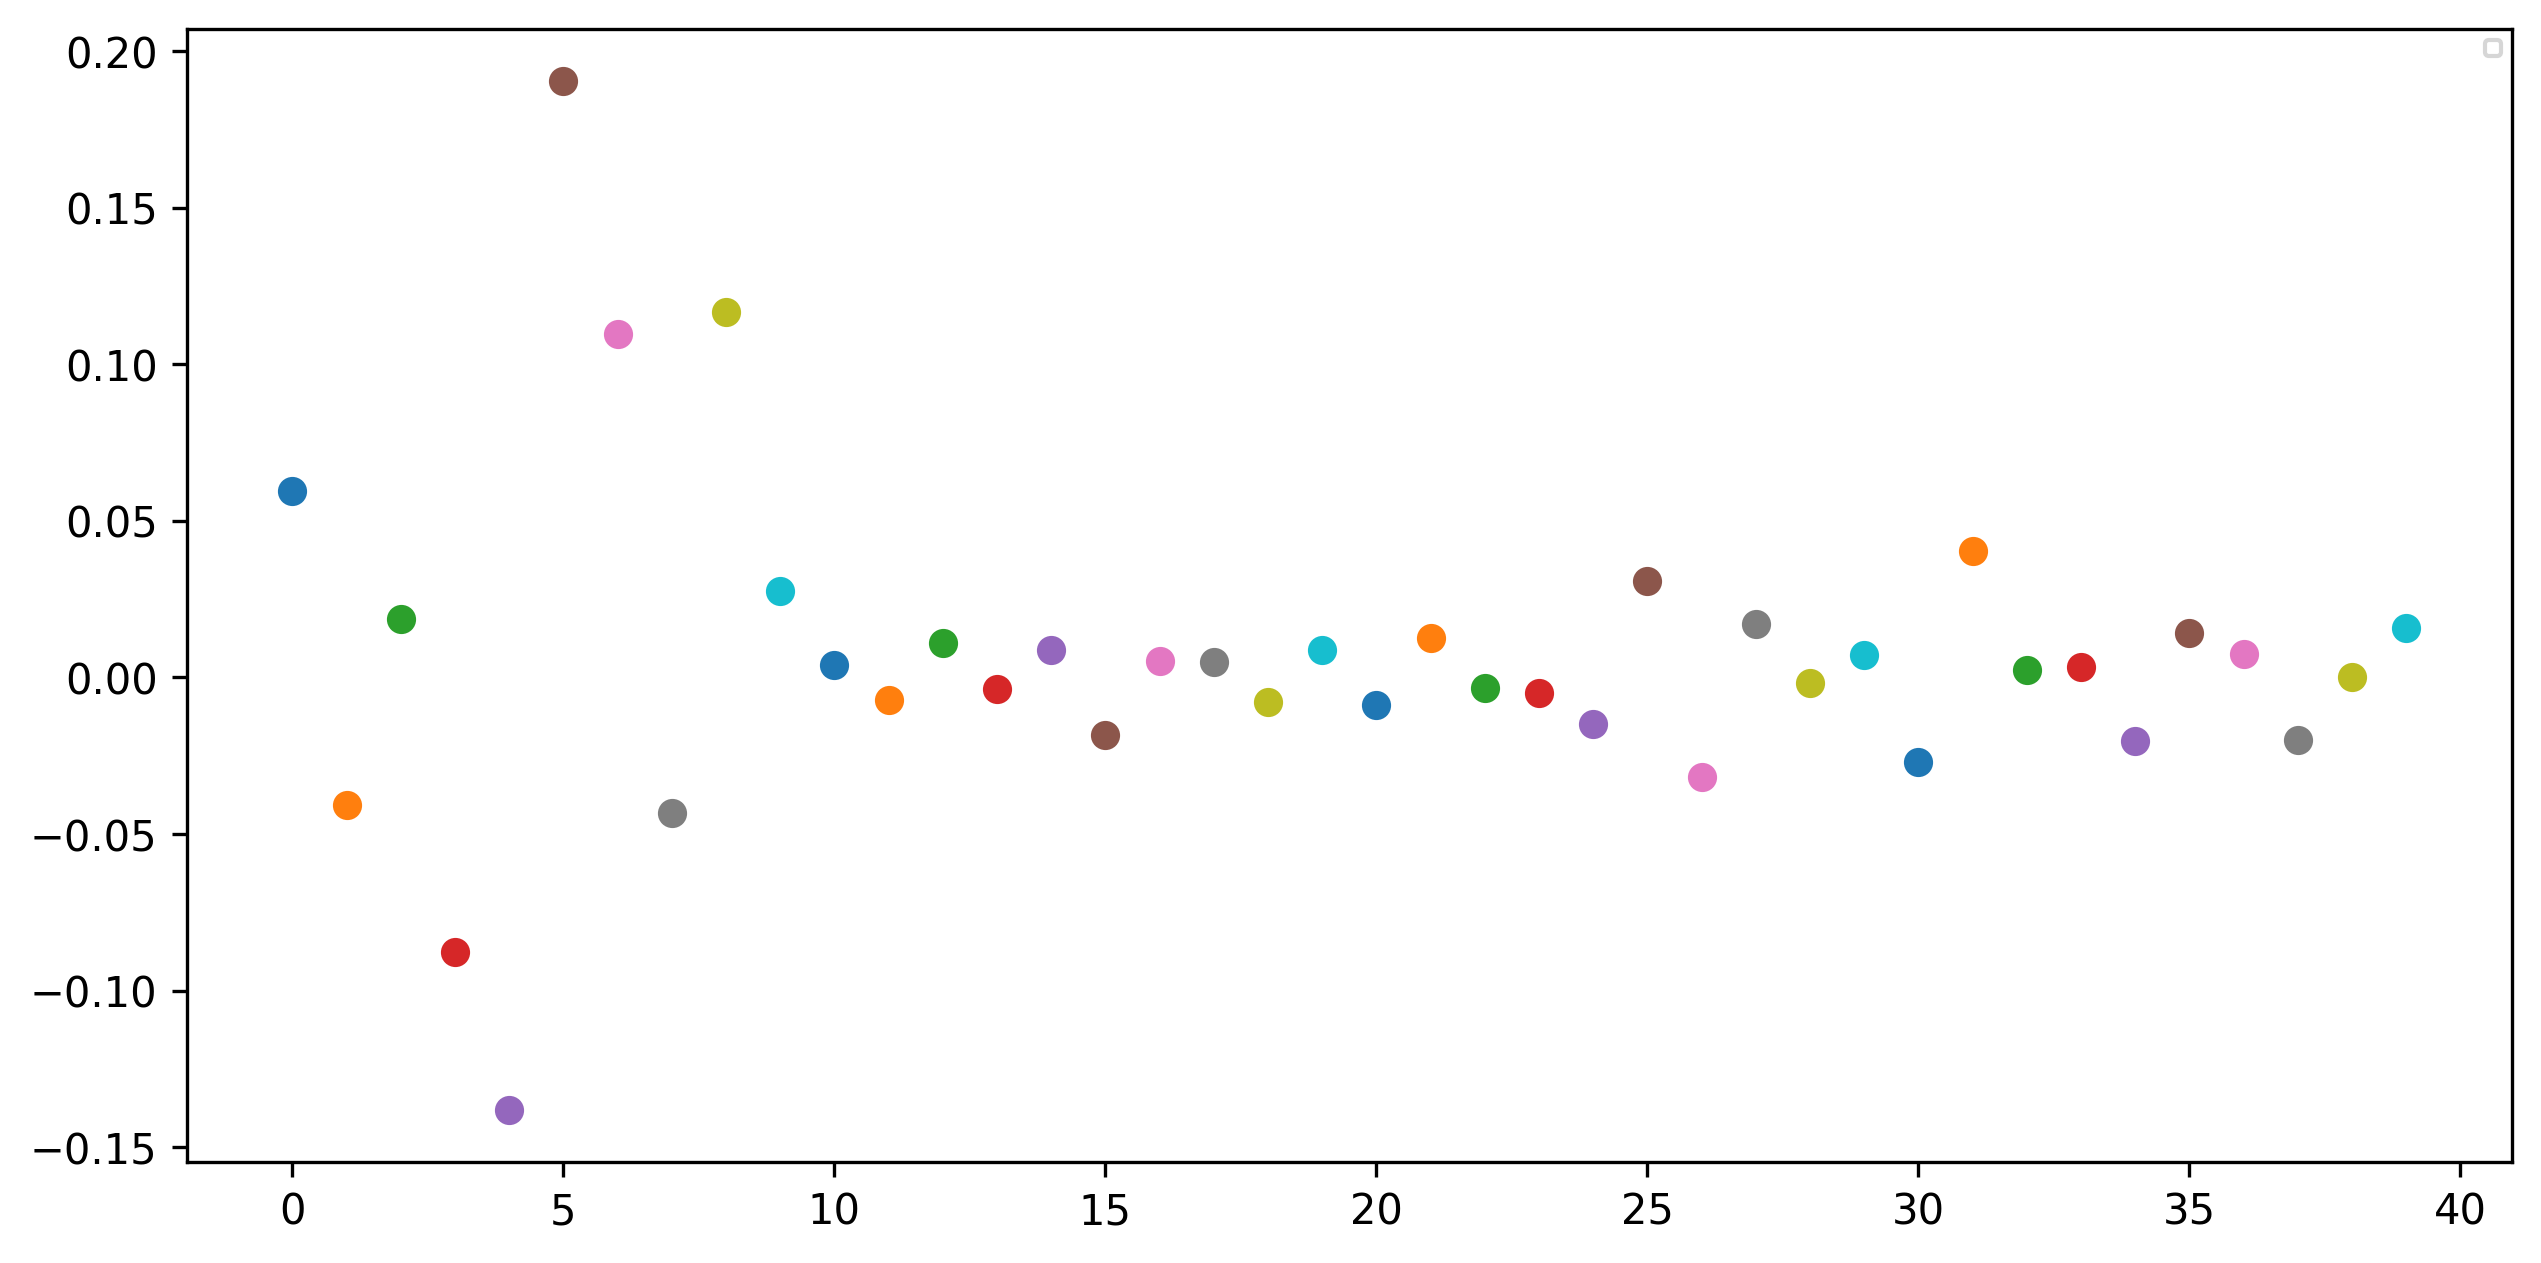

In [81]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
 
fig = plt.figure(figsize = (10, 5))
# Create the plot

for i,j in enumerate(params):
  plt.scatter(i,j[1],marker ='o')
 
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300 
plt.legend(loc=1, prop={'size': 5}) 
# Show the plot
plt.show()

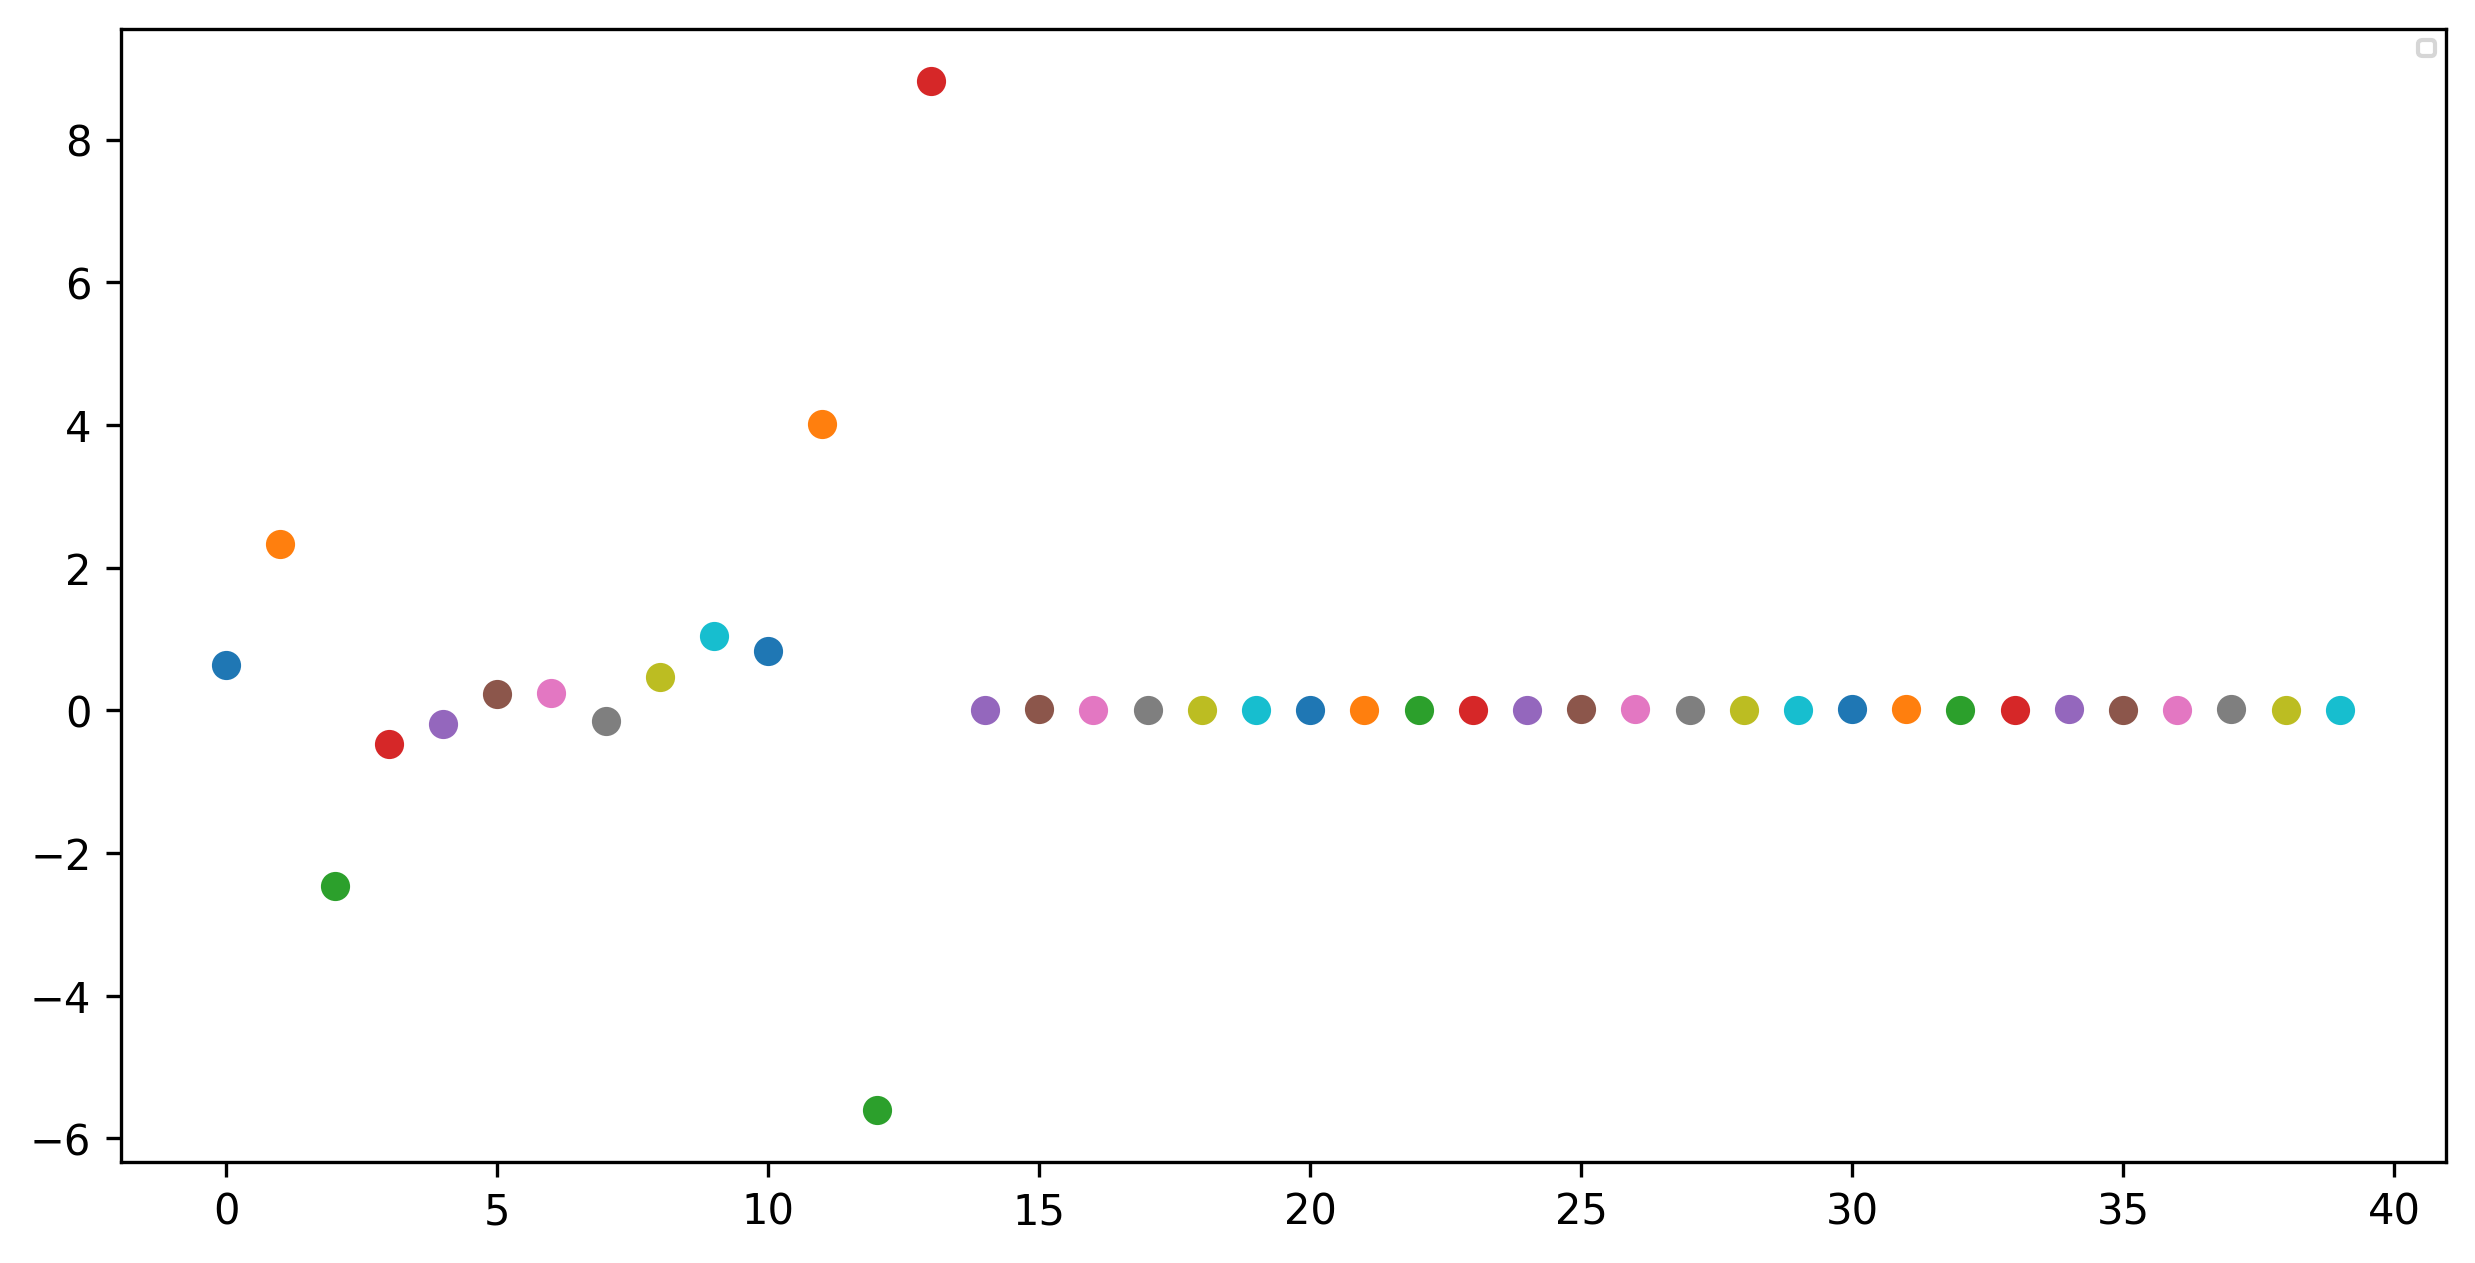

In [82]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
 
fig = plt.figure(figsize = (10, 5))
# Create the plot

for i,j in enumerate(params):
  if j[0]<10:
    plt.scatter(i,j[0],marker ='o')
 
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300 
plt.legend(loc=1, prop={'size': 5}) 
# Show the plot
plt.show()

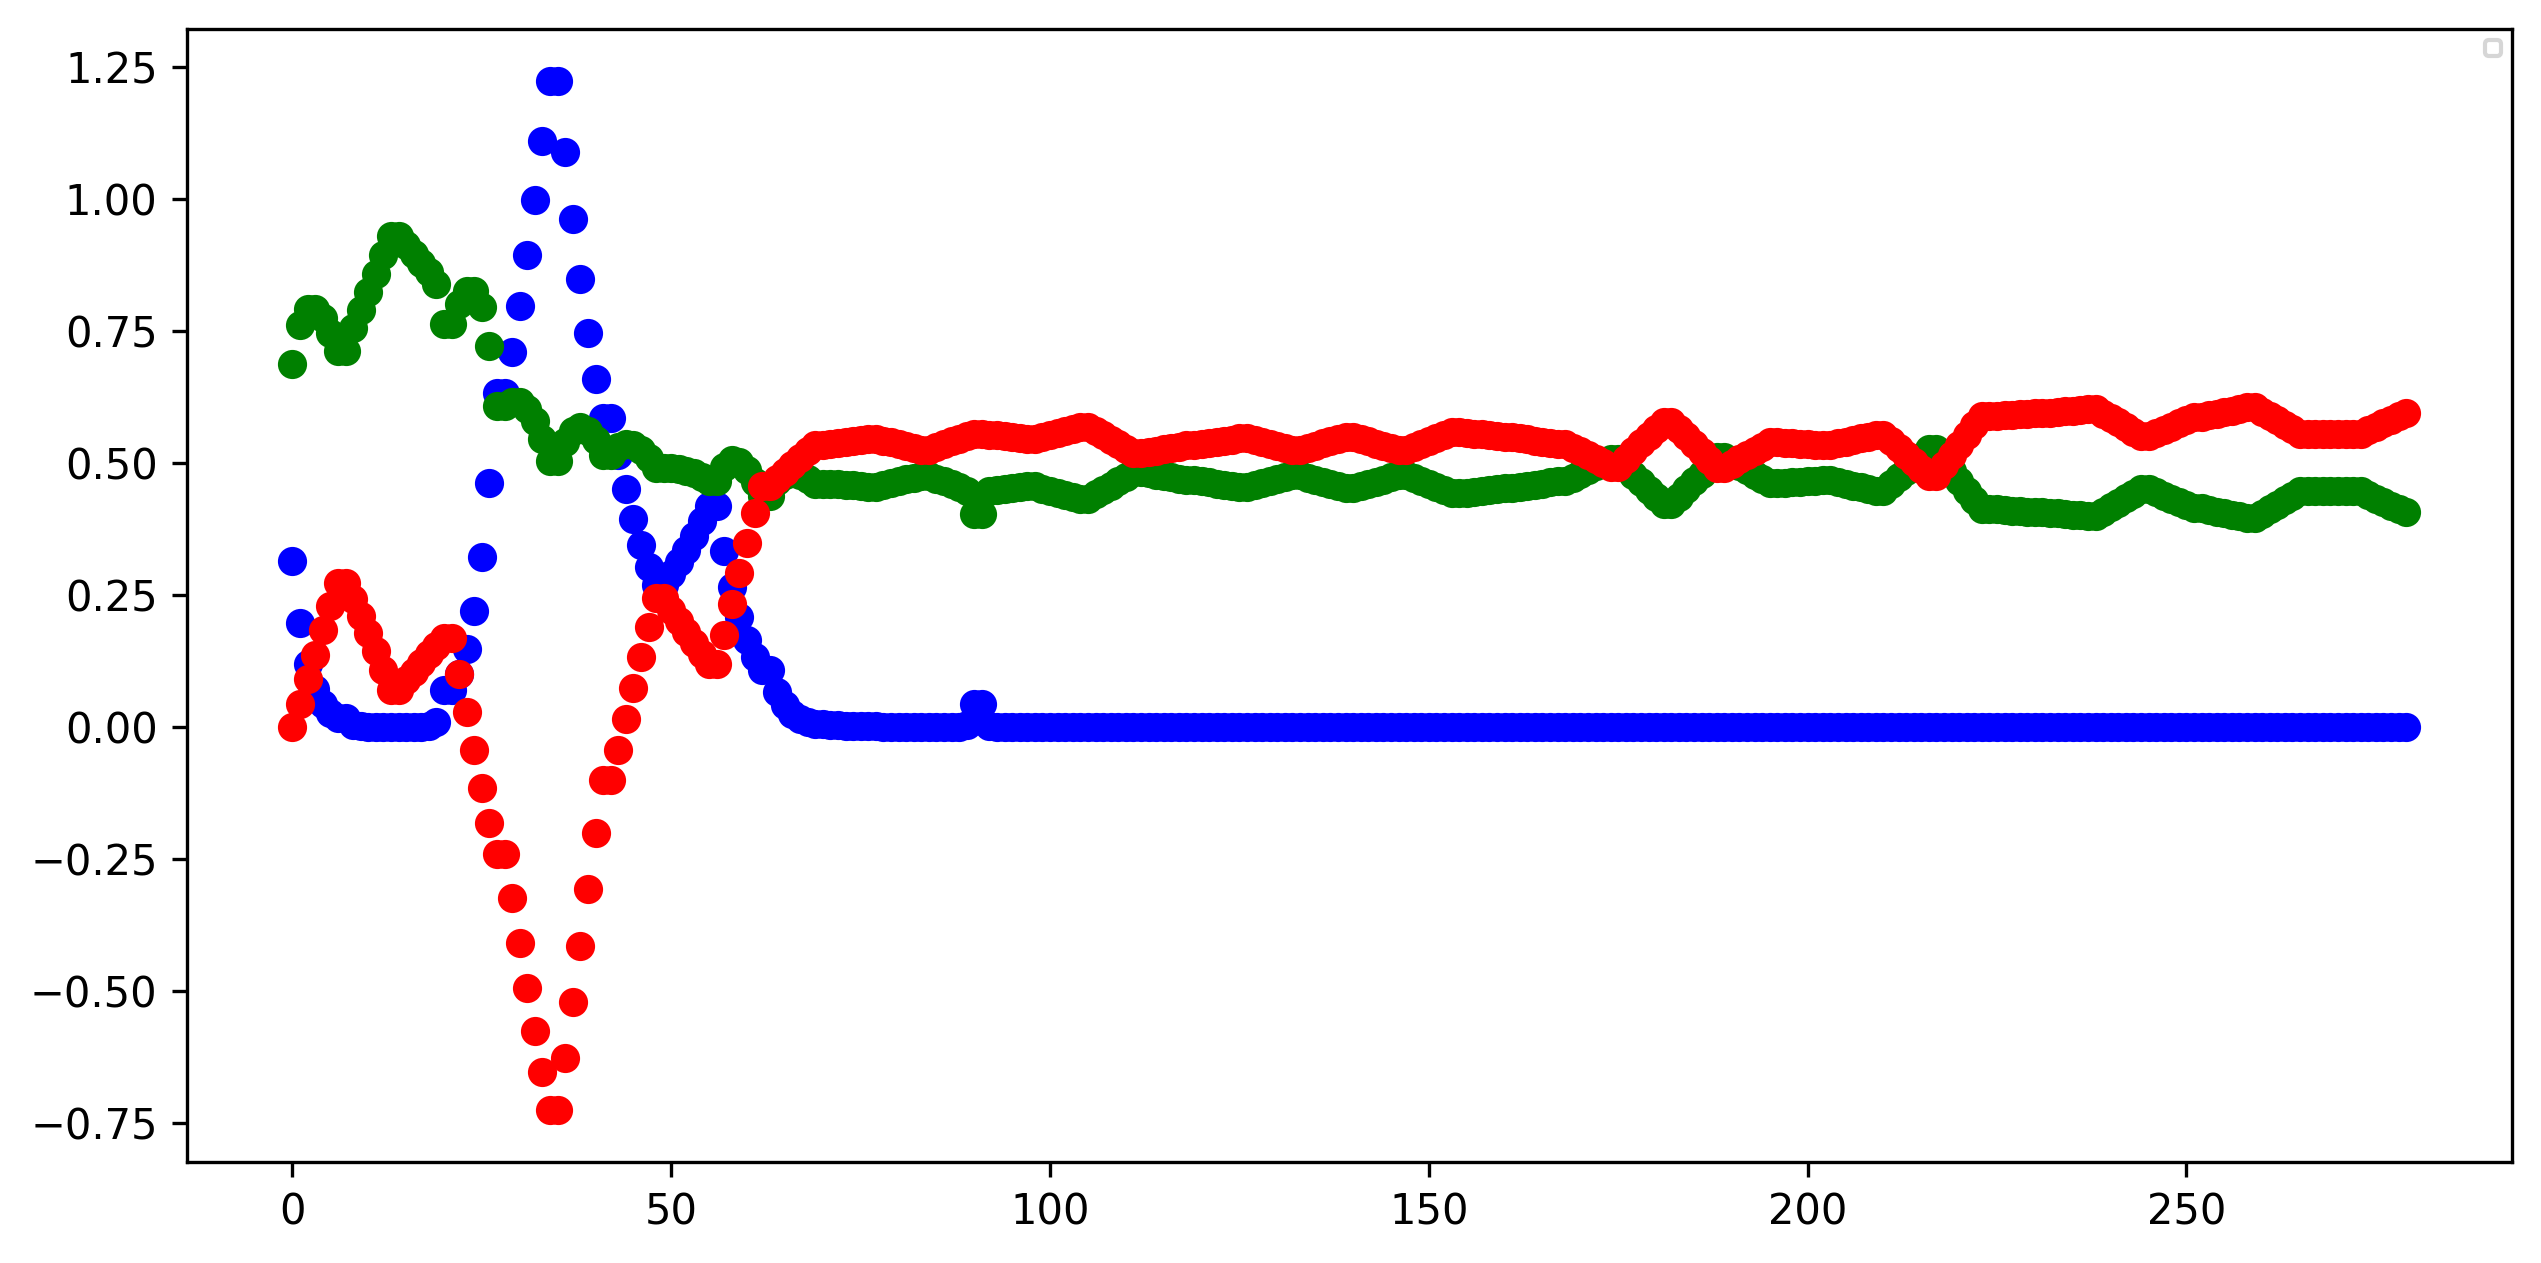

In [83]:
fig = plt.figure(figsize = (10, 5))
# Create the plot

for p in range(len(S_f)):
  for i,j in enumerate(S_f[p]):
    z=7*p+i
    plt.scatter(z,j, color = 'blue')

for p in range(len(I_f)):
  for i,j in enumerate(I_f[p]):
    z=7*p+i
    plt.scatter(z,j , color = 'green')

for p in range(len(R_f)):
  for i,j in enumerate(R_f[p]):
    z=7*p+i
    plt.scatter(z,j, color = 'red')
 
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300 
plt.legend(loc=1, prop={'size': 5}) 
# Show the plot
plt.show()

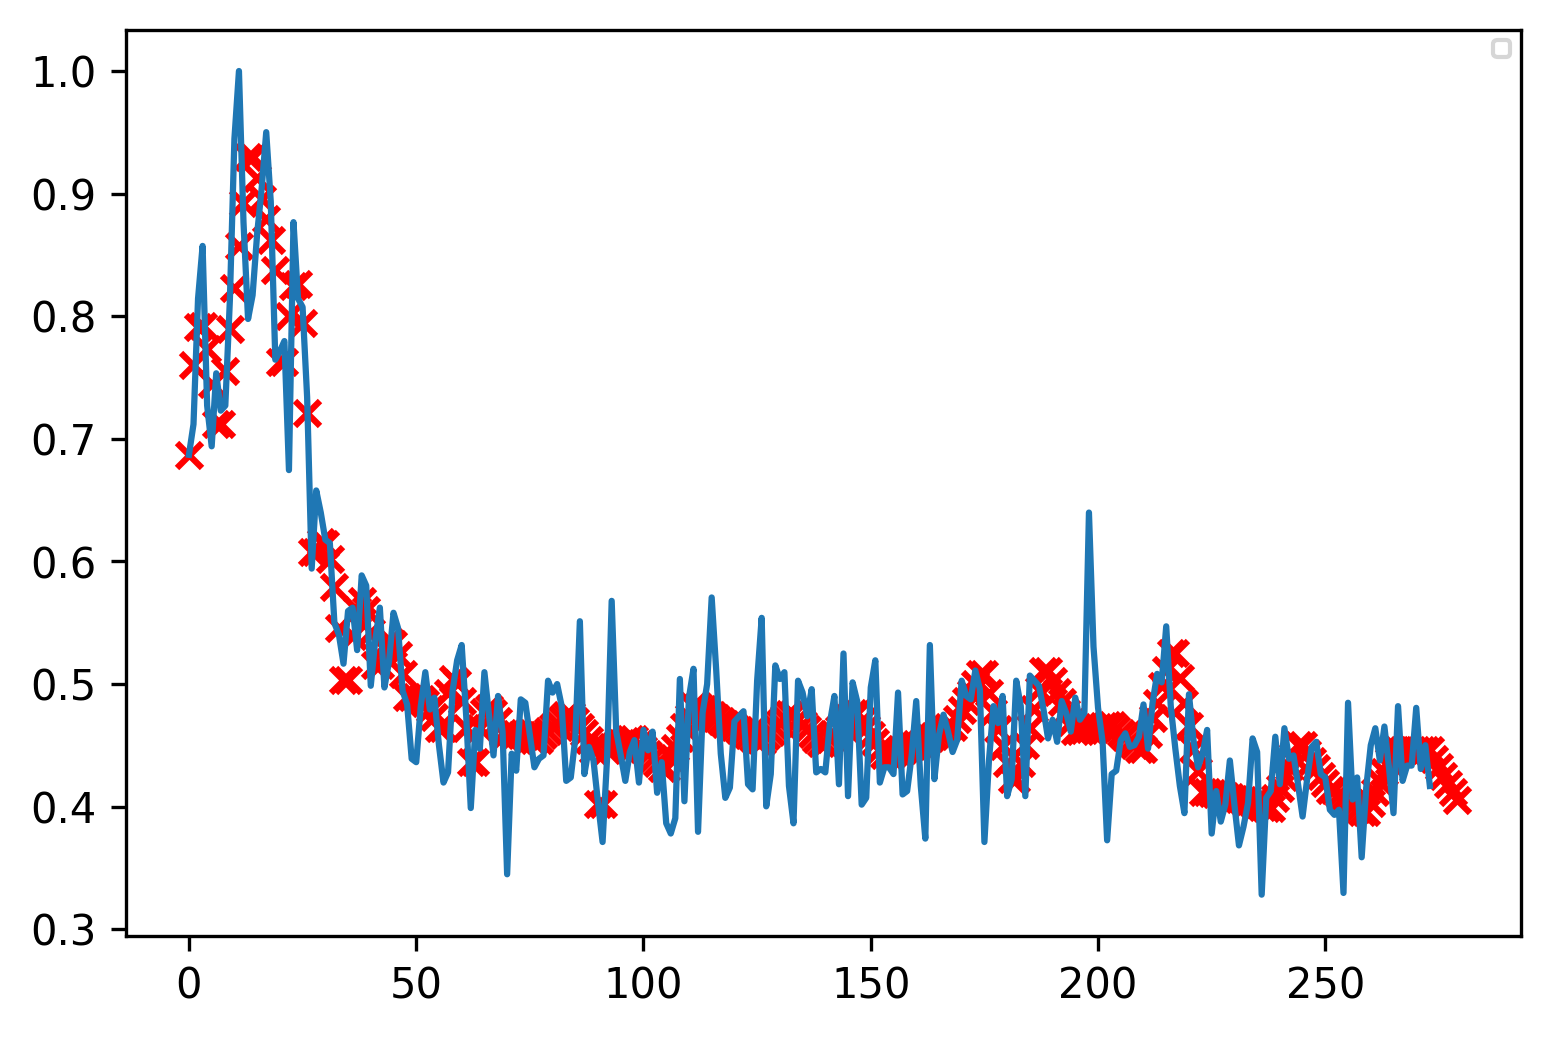

In [84]:
for p in range(len(I_f)):
  for i,j in enumerate(I_f[p]):
    z=7*p+i
    plt.scatter(z,j , color = 'red', marker = 'x')

plt.plot(xxx)
 
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300 
plt.legend(loc=1, prop={'size': 5}) 
# Show the plot
plt.show()

In [32]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [33]:
# reading and creating networkx netwwork for specific county

def get_network(f):
    
  graph_i = pd.read_csv(f,header=None)

  graph_i = graph_i.values
  graph_i
  G = nx.DiGraph()
  G.add_edges_from(graph_i)
  num_nodes = G.number_of_nodes()
  print(num_nodes)
  return G
# type(graph_i)

g1 = get_network('/content/wy_contact_network_config_min_5_max_100_alpha_400_2-cm-56027.GraphEdge (1).txt')

2100


In [34]:
#g1= nx.read_edgelist('/content/wy_contact_network_config_min_5_max_100_alpha_400_2-cm-56027.GraphEdge (1).txt', create_using = nx.Graph(), nodetype= int)
print (nx.info(g1))

DiGraph with 2100 nodes and 91631 edges


In [35]:
import random

In [36]:
from typing import Dict, List, Optional, Set, Tuple
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import copy


def simulate_one_round_SI(
    G: nx.Graph,
    node_compartments: Dict[str, Set[int]],
    beta: float,
    gamma: float,
    rng: np.random.RandomState = np.random.RandomState(0),
):
    if len(node_compartments["I"]) == 0 or len(node_compartments["S"]) == 0:
        return node_compartments

    s_to_i = []
    i_to_r = []

    for node in node_compartments["I"]:
        for neighbor in set(G.neighbors(node)).intersection(node_compartments["S"]):
            if rng.rand() < abs(beta):
                s_to_i.append(neighbor)
    for node in set(s_to_i):
        node_compartments["S"].remove(node)
        node_compartments["I"].add(node)
    
    for node in node_compartments["R"]:
        for neighbor in set(G.neighbors(node)).intersection(node_compartments["I"]):
            if rng.rand() < abs(gamma):
                i_to_r.append(neighbor)
    for node in set(i_to_r):
        node_compartments["I"].remove(node)
        node_compartments["R"].add(node)

    return node_compartments


def simulate_t_steps_SI(
    G: nx.Graph,
    i_frac: float,
    r_frac: float,
    beta: float,
    gamma: float,
    num_rounds: int,
    seed: Optional[int],
    full_output: bool = False,
):
    rng = np.random.RandomState(seed) if seed is not None else np.random.RandomState()

    num_nodes = G.number_of_nodes()
    i_num = int(i_frac * num_nodes)
    r_num = int(r_frac * num_nodes)
    s_num = num_nodes - i_num -r_num
    nodes_perm = rng.permutation(G.nodes)
    node_compartments = {
        "S": set(nodes_perm[:s_num].tolist()),
        "I": set(nodes_perm[s_num:(s_num+i_num)].tolist()),
        "R": set(nodes_perm[(s_num+i_num):].tolist()),
    }
    s = [s_num]
    i = [i_num]
    r = [r_num]
    if full_output:
        s_full = [copy.deepcopy(node_compartments["S"])]
        i_full = [copy.deepcopy(node_compartments["I"])]
        r_full = [copy.deepcopy(node_compartments["R"])]

    for _ in range(num_rounds):
        node_compartments = simulate_one_round_SI(G, node_compartments, beta,gamma, rng)
        if full_output:
            s_full.append(copy.deepcopy(node_compartments["S"]))
            i_full.append(copy.deepcopy(node_compartments["I"]))
            r_full.append(copy.deepcopy(node_compartments["R"]))

        s.append(len(node_compartments["S"])) # How many are in I each time-step 
        i.append(len(node_compartments["I"])) # There are 201 time-steps
        r.append(len(node_compartments["R"])) # There are 201 time-steps

    ans = {"S": np.array(s), "I": np.array(i), "R": np.array(r)}
    if full_output:
        return ans, s_full, i_full, r_full
    return ans


In [37]:
g1.number_of_nodes()

2100

In [38]:
#def simulate_t_steps_SI( G: nx.Graph, i_frac: float, beta: float, num_rounds: int, seed: Optional[int],full_output: bool = False,)

i_frac = 0.7 #4/g1.number_of_nodes() # Initial number of infected nodes!
r_frac = 0.1
beta = 0.005 # beta value
gamma = 0.002 
num_rounds = 280 # Number of time-steps
full_output = False
num_iter = 5 # added parameter to the existing code
y_sum =[]
i_daily_s =[]

yr_sum =[]
r_daily_s =[]

for j in range(num_iter):
  l = simulate_t_steps_SI(g1,i_frac,r_frac,beta,gamma,num_rounds,full_output)
  y = (l['I'])/len(g1.nodes) # after 100 time-steps we have an array of Infected nodes
  yS = (l['S'])/len(g1.nodes)
  yR = (l['R'])/len(g1.nodes)

  i_daily = []
  i_0 = 0
  for i in (y):
    i_daily.append(i - i_0)
    i_0 = i
  i_daily = np.array(i_daily)

  y_sum.append(y)
  i_daily_s.append(i_daily)

  r_daily = []
  r_0 = 0
  for r in (yR):
    r_daily.append(r - r_0)
    r_0 = r
  r_daily = np.array(r_daily)

  yr_sum.append(yR)
  r_daily_s.append(r_daily)


In [ ]:
# averaging btw the iterations 

zee = np.mean(y_sum, axis =0)
zee_d = np.mean(i_daily_s, axis =0)
lst = list(range(len(zee_d)))

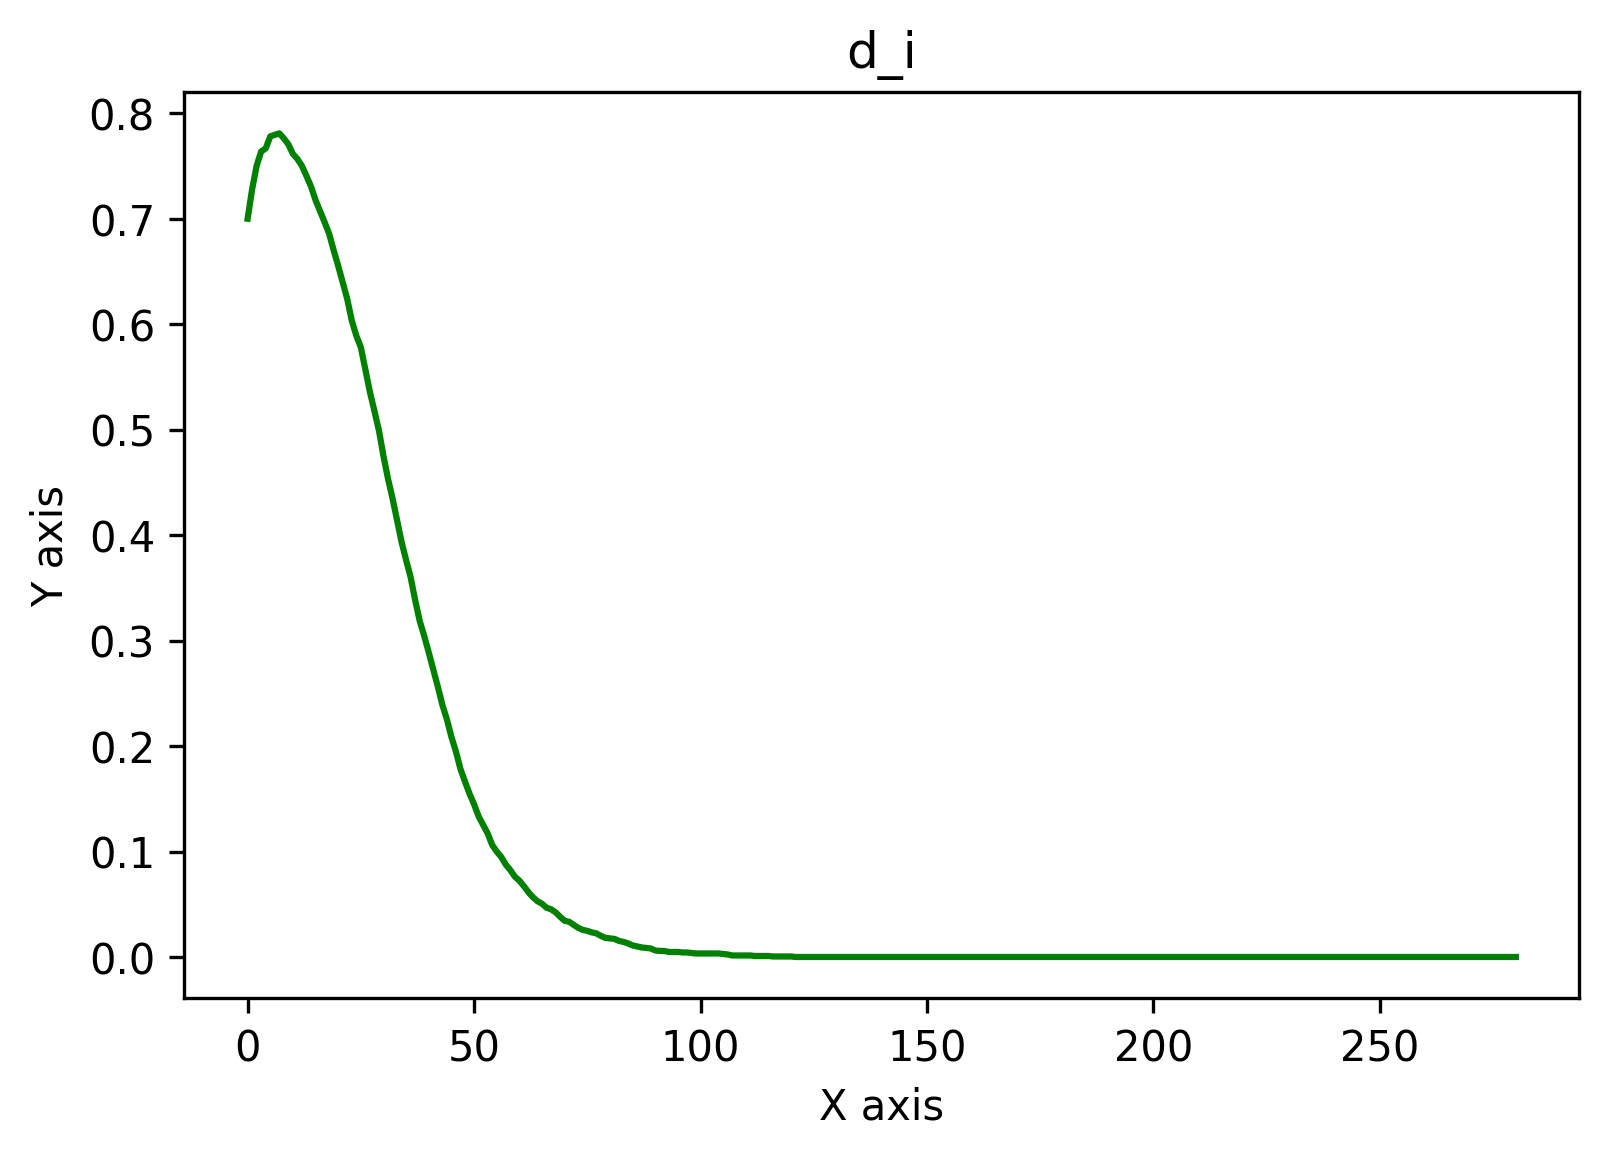

In [ ]:
# plotting
plt.title("d_i")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(lst, zee, color ="green")
plt.show()

In [ ]:
array([-1.83722383e-09,  2.43491037e-03])

In [49]:
#def simulate_t_steps_SI( G: nx.Graph, i_frac: float, beta: float, num_rounds: int, seed: Optional[int],full_output: bool = False,)

i_frac = 0.7 #4/g1.number_of_nodes() # Initial number of infected nodes!
r_frac = 0.1
beta = -1.83722383e-09 # beta value
gamma = 2.43491037e-03 
num_rounds = 280 # Number of time-steps
full_output = False
num_iter = 5 # added parameter to the existing code
y_sum =[]
i_daily_s =[]

yr_sum =[]
r_daily_s =[]

for j in range(num_iter):
  l = simulate_t_steps_SI(g1,i_frac,r_frac,beta,gamma,num_rounds,full_output)
  y = (l['I'])/len(g1.nodes) # after 100 time-steps we have an array of Infected nodes
  yS = (l['S'])/len(g1.nodes)
  yR = (l['R'])/len(g1.nodes)

  i_daily = []
  i_0 = 0
  for i in (y):
    i_daily.append(i - i_0)
    i_0 = i
  i_daily = np.array(i_daily)

  y_sum.append(y)
  i_daily_s.append(i_daily)

  r_daily = []
  r_0 = 0
  for r in (yR):
    r_daily.append(r - r_0)
    r_0 = r
  r_daily = np.array(r_daily)

  yr_sum.append(yR)
  r_daily_s.append(r_daily)


In [50]:
# averaging btw the iterations 

zee = np.mean(y_sum, axis =0)
zee_d = np.mean(i_daily_s, axis =0)
lst = list(range(len(zee_d)))

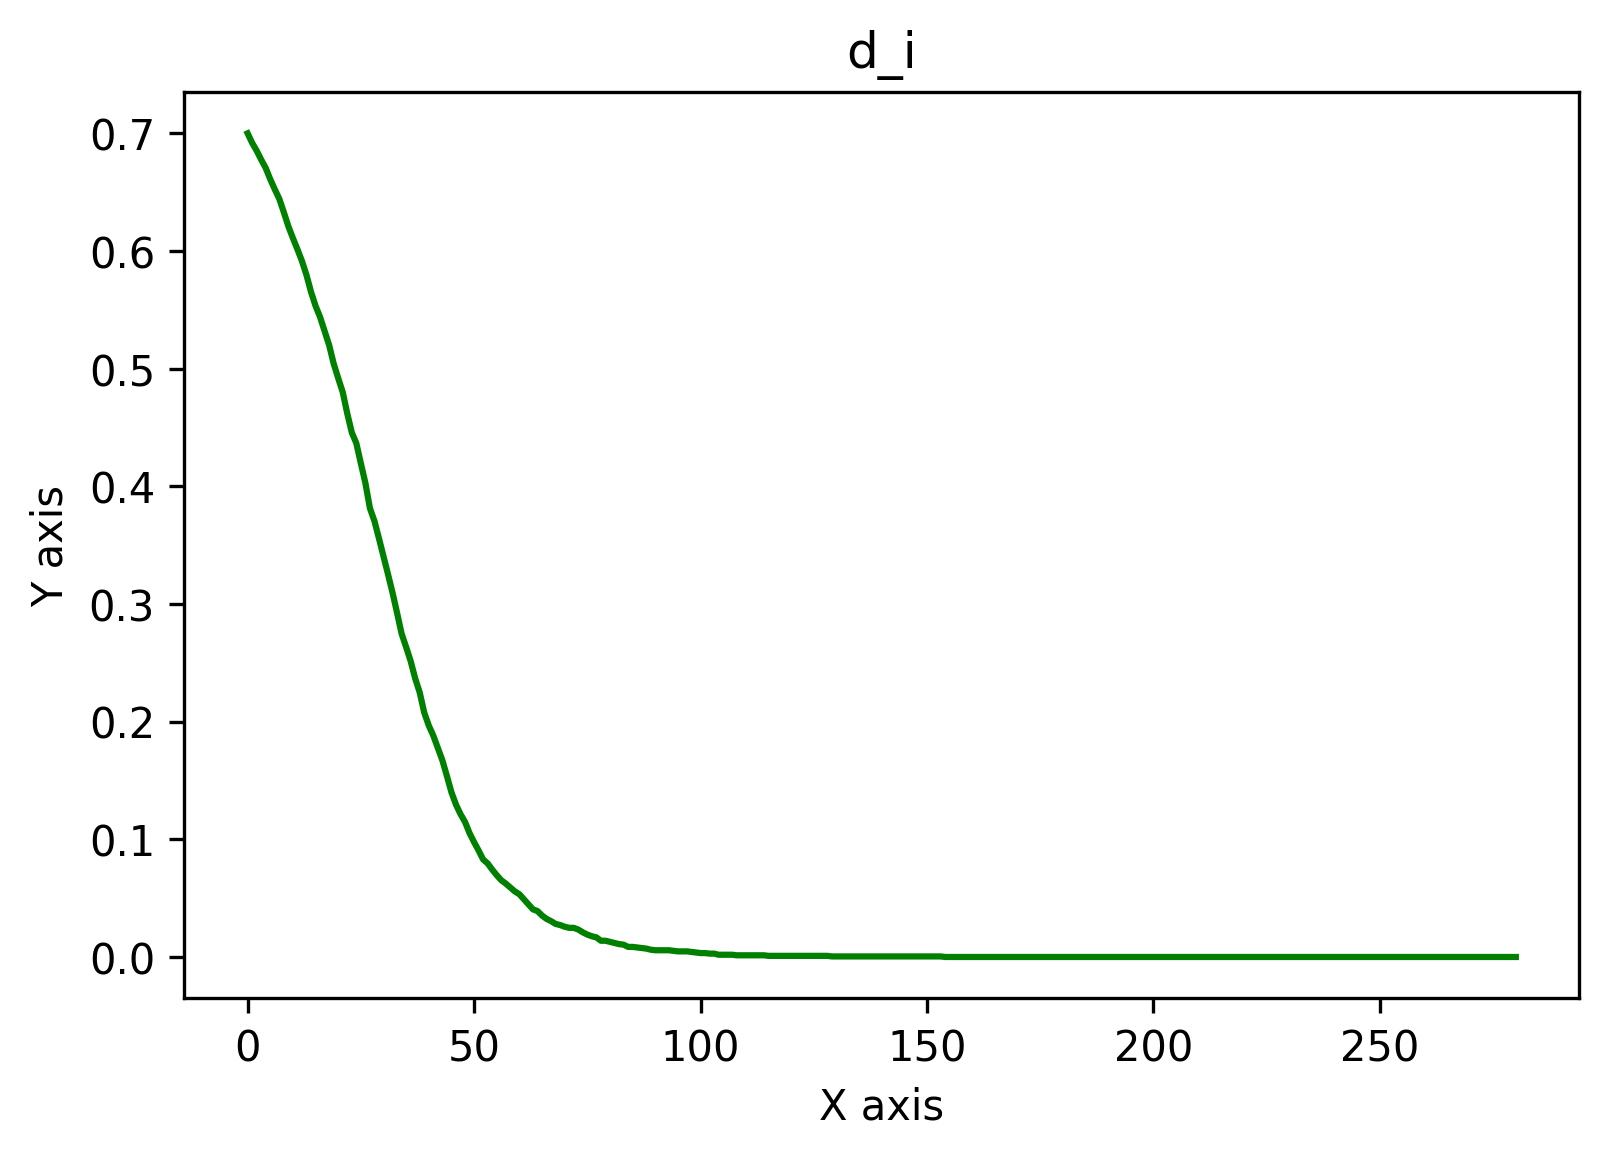

In [51]:
# plotting
plt.title("d_i")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(lst, zee, color ="green")
plt.show()

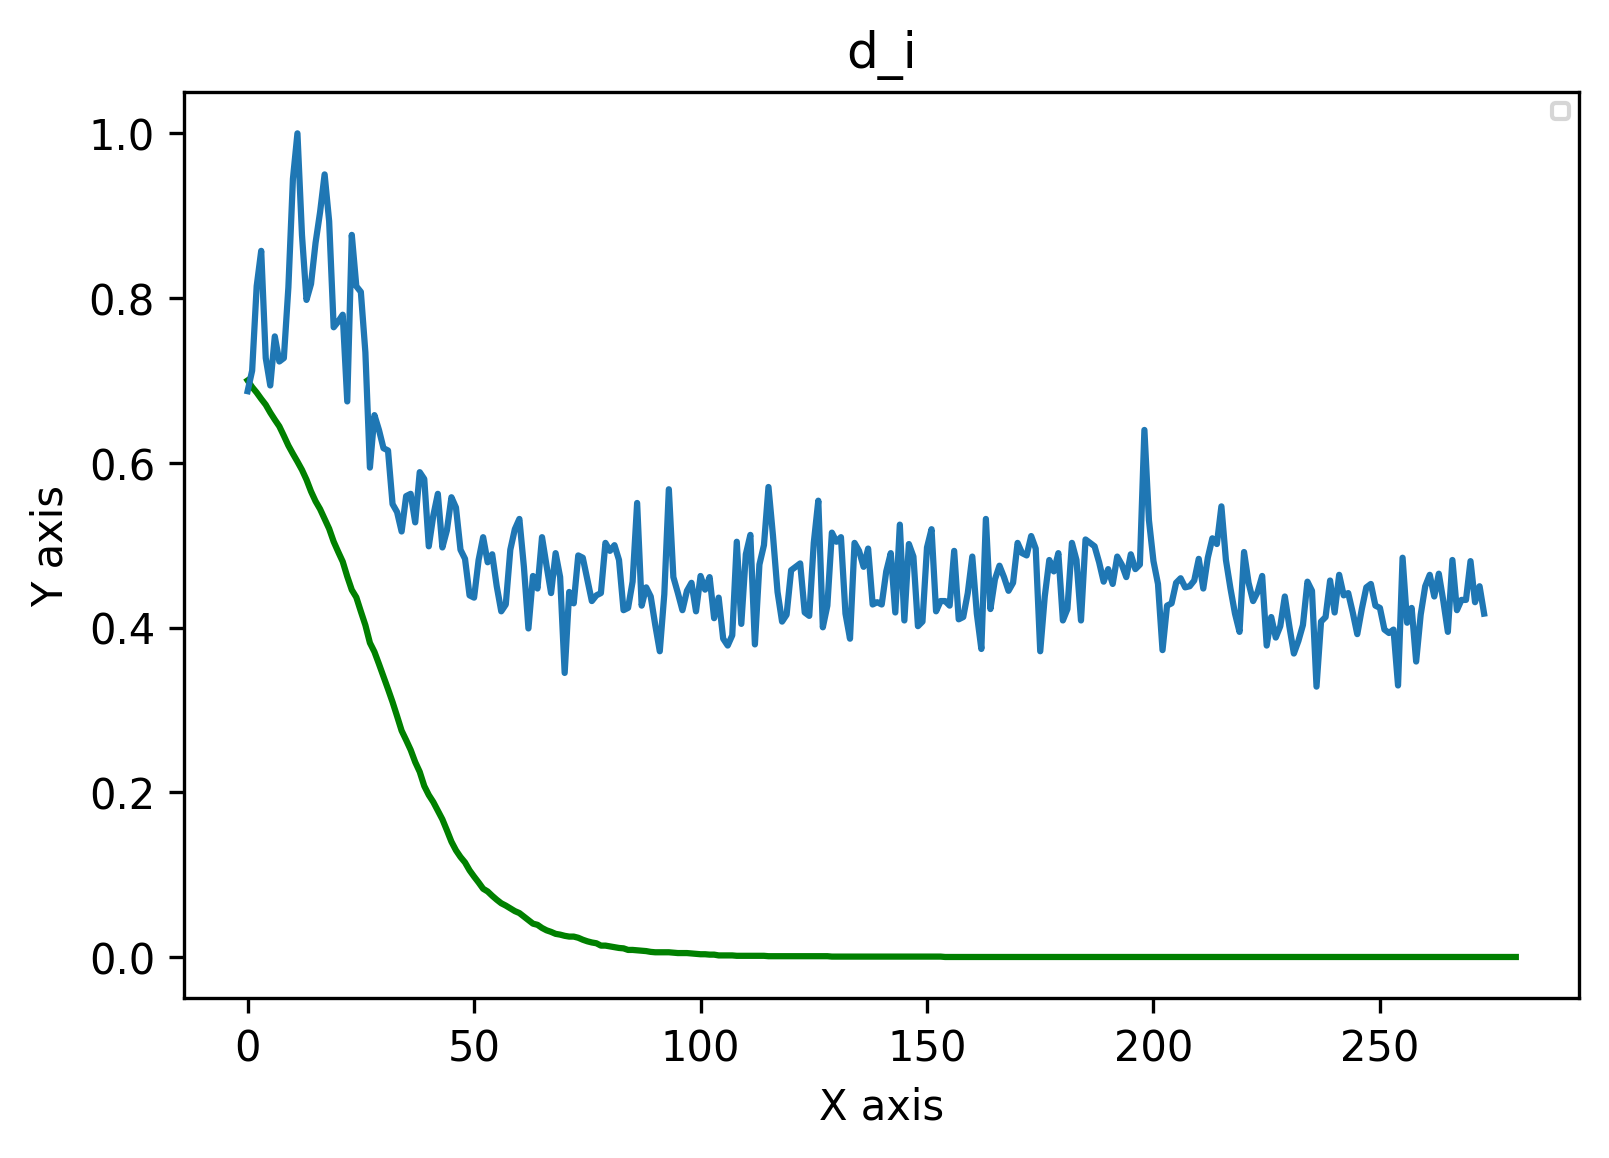

In [52]:
# plotting
plt.title("d_i")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(lst, zee, color ="green")


plt.plot(xxx)
 
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300 
plt.legend(loc=1, prop={'size': 5}) 
# Show the plot
plt.show()

plt.show()

In [ ]:
beta = -1.83722383e-09 # beta value
gamma = 2.43491037e-03 

In [60]:
for j,k in enumerate(gamma):
  if(j>40)&(k>0):
    gamma[j] = -k
    

In [ ]:
beta

In [91]:
from typing import Dict, List, Optional, Set, Tuple
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm
import copy

def simulate_one_round_SI(
    G: nx.Graph,
    node_compartments: Dict[str, Set[int]],
    betai: float,
    gammai: float,
    k: float,
    ):
  
    s_to_i = []
    i_to_r = []

    rng = np.random.RandomState(k)

    #print('k in func',k)
    #print(rng.rand())

    for node in node_compartments["I"]:
        for neighbor in set(G.neighbors(node)).intersection(node_compartments["S"]):
            #if betai<0:
            #  pass
            if rng.rand() < betai:
                s_to_i.append(neighbor)
    for node in set(s_to_i):
        node_compartments["S"].remove(node)
        node_compartments["I"].add(node)
    
    for node in node_compartments["I"]:
        #if gammai<0:
        #  pass
        if rng.rand() < gammai:
            i_to_r.append(node)
    for node in set(i_to_r):
        node_compartments["I"].remove(node)
        node_compartments["R"].add(node)

    return node_compartments


def simulate_t_steps_SI(
    G: nx.Graph,
    i_frac: float,
    r_frac: float,
    beta: list,
    gamma: list,
    num_rounds: int,
    seed: Optional[int],
    full_output: bool = False,
):
    rng = np.random.RandomState(seed) if seed is not None else np.random.RandomState()

    num_nodes = G.number_of_nodes()
    i_num = int(i_frac * num_nodes)
    r_num = int(r_frac * num_nodes)
    s_num = num_nodes - i_num -r_num
    nodes_perm = rng.permutation(G.nodes)
    node_compartments = {
        "S": set(nodes_perm[:s_num].tolist()),
        "I": set(nodes_perm[s_num:(s_num+i_num)].tolist()),
        "R": set(nodes_perm[(s_num+i_num):].tolist()),
    }
    s = [s_num]
    i = [i_num]
    r = [r_num]

    if full_output:
        s_full = [copy.deepcopy(node_compartments["S"])]
        i_full = [copy.deepcopy(node_compartments["I"])]
        r_full = [copy.deepcopy(node_compartments["R"])]

    for k in range(num_rounds):

        betai = beta[k]
        gammai = gamma[k]

        rng = np.random.RandomState(k)

        #print('k before',k)

        node_compartments = simulate_one_round_SI(G, node_compartments, betai, gammai, k)

        #print('k after',k)

        if full_output:
            s_full.append(copy.deepcopy(node_compartments["S"]))
            i_full.append(copy.deepcopy(node_compartments["I"]))
            r_full.append(copy.deepcopy(node_compartments["R"]))

        s.append(len(node_compartments["S"])) # How many are in I each time-step 
        i.append(len(node_compartments["I"])) # There are 201 time-steps
        r.append(len(node_compartments["R"])) # There are 201 time-steps

    ans = {"S": np.array(s), "I": np.array(i), "R": np.array(r)}

    if full_output:
        return ans, s_full, i_full, r_full
    return ans


In [99]:
#def simulate_t_steps_SI( G: nx.Graph, i_frac: float, beta: float, num_rounds: int, seed: Optional[int],full_output: bool = False,)

i_frac = 0.689 #4/g1.number_of_nodes() # Initial number of infected nodes!
r_frac = 0.0
# beta = 0.005 # beta value
# gamma = 0.002 
num_rounds = 280 # Number of time-steps
full_output = False
num_iter = 50 # added parameter to the existing code
y_sum =[]
i_daily_s =[]

yr_sum =[]
r_daily_s =[]

ys_sum =[]
s_daily_s =[]

yr_sum =[]
r_daily_s =[]

for j in range(num_iter):
  l = simulate_t_steps_SI(g1,i_frac,r_frac,beta,gamma,num_rounds,full_output)
  y = (l['I'])/len(g1.nodes) # after 100 time-steps we have an array of Infected nodes
  yS = (l['S'])/len(g1.nodes)
  yR = (l['R'])/len(g1.nodes)

  i_daily = []
  i_0 = 0
  for i in (y):
    i_daily.append(i - i_0)
    i_0 = i
  i_daily = np.array(i_daily)

  y_sum.append(y)
  i_daily_s.append(i_daily)

  r_daily = []
  r_0 = 0
  for r in (yR):
    r_daily.append(r - r_0)
    r_0 = r
  r_daily = np.array(r_daily)

  yr_sum.append(yR)
  r_daily_s.append(r_daily)


In [100]:
# averaging btw the iterations 

zee = np.mean(y_sum, axis =0)
zee_d = np.mean(i_daily_s, axis =0)
lst = list(range(len(zee_d)))

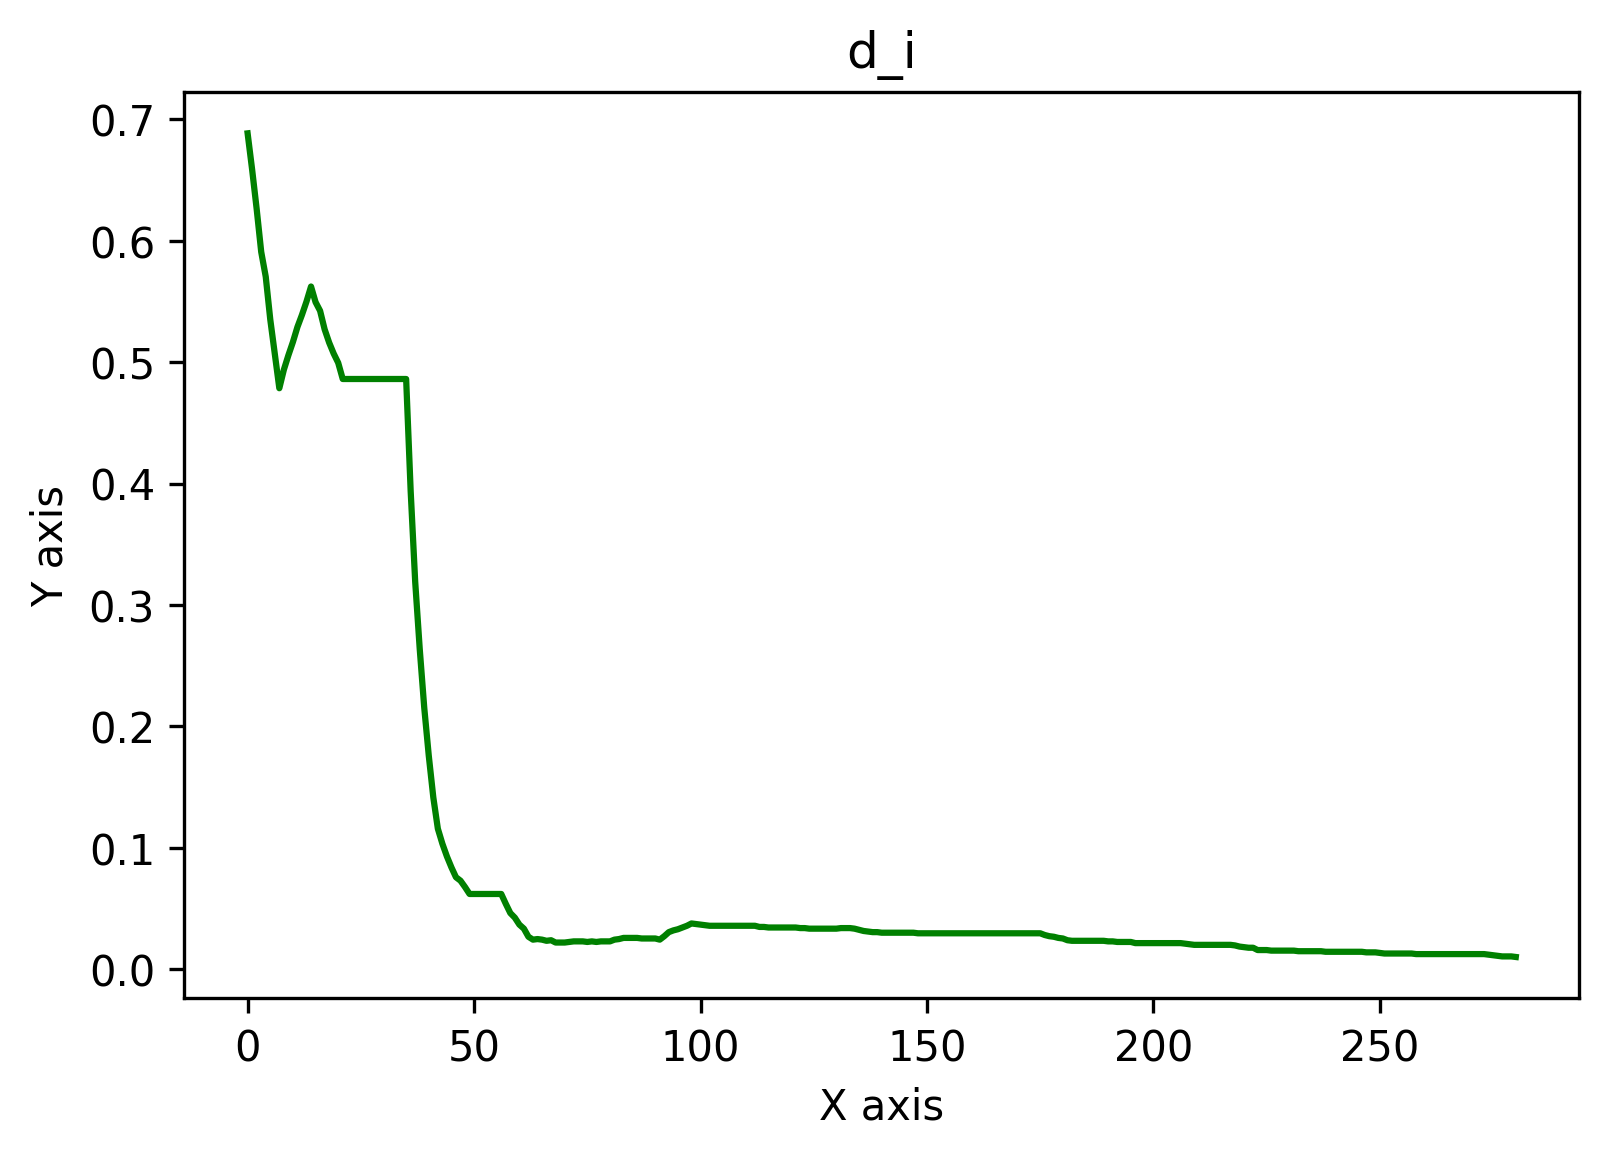

In [101]:
# plotting
plt.title("d_i")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(lst, zee, color ="green")
plt.show()

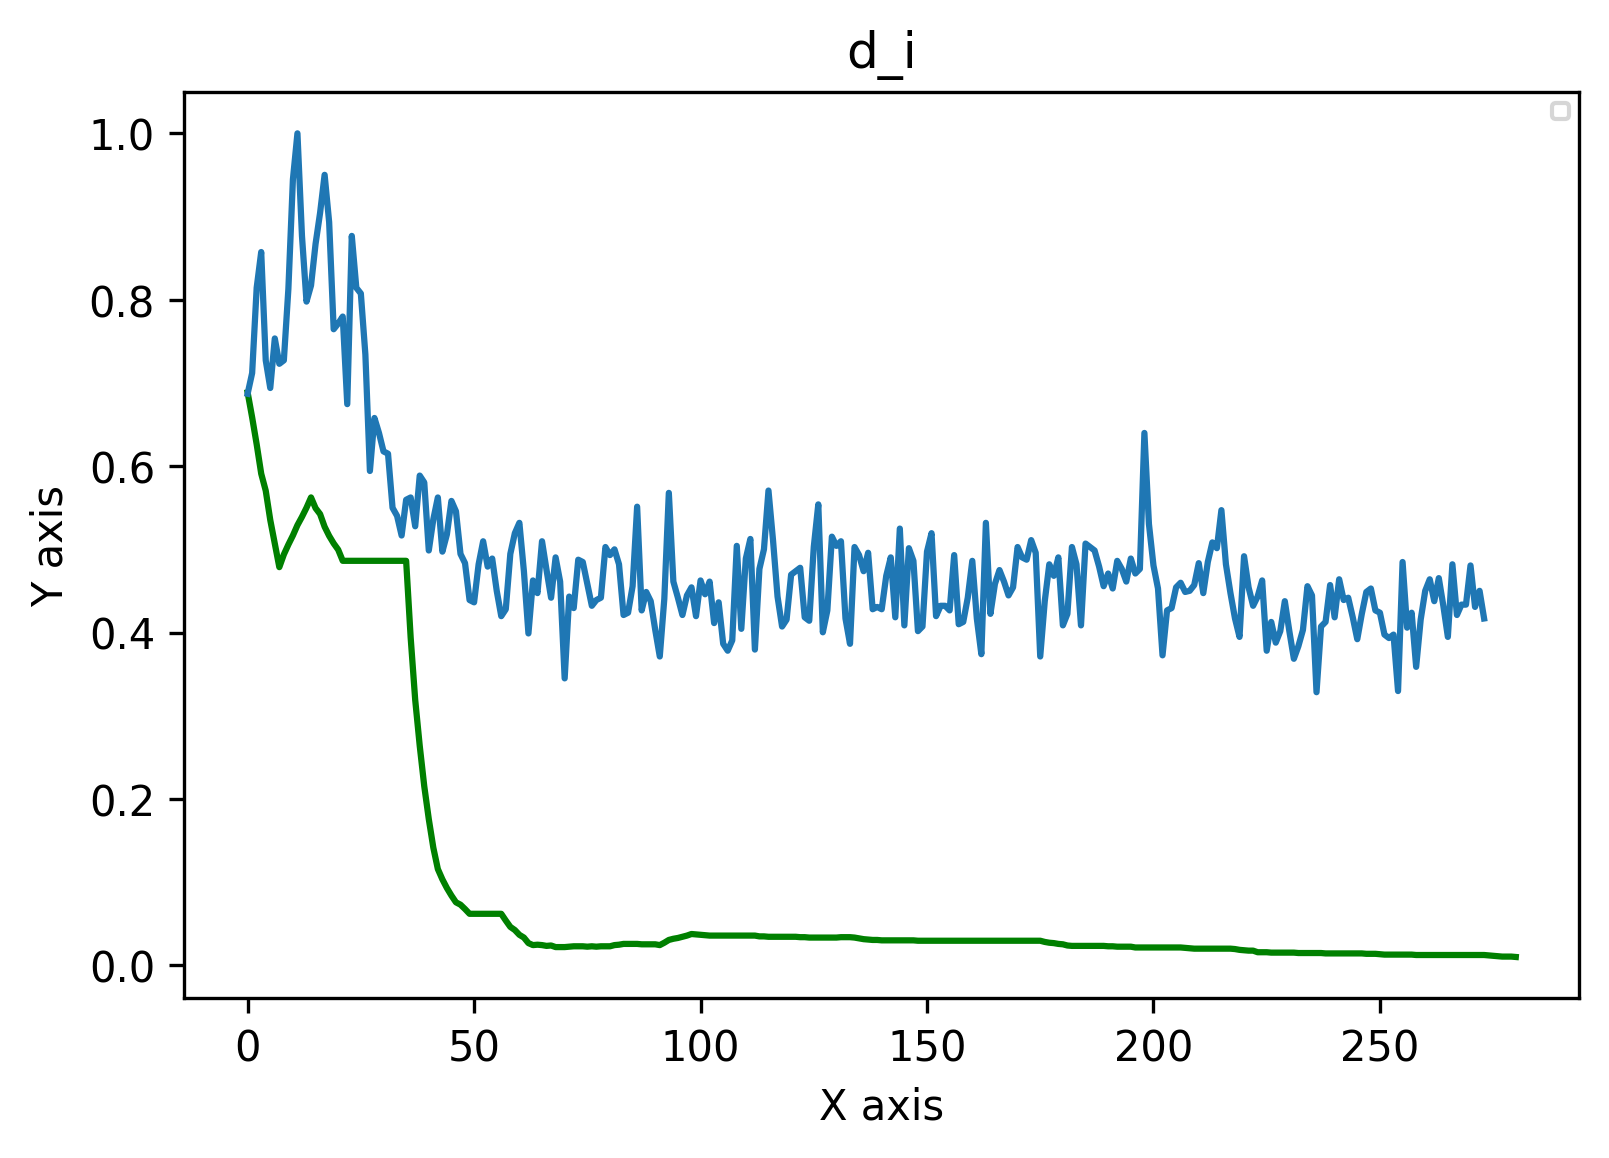

In [102]:
# plotting
plt.title("d_i")
plt.xlabel("X axis")
plt.ylabel("Y axis")
plt.plot(lst, zee, color ="green")


plt.plot(xxx)
 
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300 
plt.legend(loc=1, prop={'size': 5}) 
# Show the plot
plt.show()

plt.show()